---
# Jeanette's Workbook
---


In [1]:
import pandas as pd

# Acquire
import requests
from bs4 import BeautifulSoup
import api

# Explore
import matplotlib.pyplot as plt
import seaborn as sns

# Blocking Warning Boxes
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)


---
# Acquire
---

In [2]:
# Collecting the data from the API and converting it into a csv
csv_url = f'https://api.covidactnow.org/v2/country/US.timeseries.csv?apiKey={api.key}'
req = requests.get(csv_url)
url_content = req.content

# Create a csv and open it to recieve content
csv_file = open('aggregated_us_data.csv', 'wb')

# Write content into csv file
csv_file.write(url_content)

# Save and Close csv file
csv_file.close()

---
# Prepare
---

In [3]:
# Read the csv into a dataframe
covid = pd.read_csv('aggregated_us_data.csv', index_col=0)
covid.head()

,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,unused1,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,unused2,actuals.newCases,actuals.vaccinesDistributed,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,metrics.testPositivityRatio,metrics.testPositivityRatioDetails,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,unused3,unused4,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel,actuals.vaccinationsAdditionalDose,metrics.vaccinationsAdditionalDoseRatio,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.12,1.04,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,US,NaN,NaN,0,NaN,NaN,iso1:us,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.13,1.02,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,US,NaN,NaN,0,NaN,NaN,iso1:us,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.14,1.01,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# How big is this dataframe?
covid.shape

(808, 58)

In [5]:
# How many nulls are in the data? 
covid.isna().sum()

country                                            0
state                                            808
county                                           808
fips                                               0
lat                                              808
long                                             808
locationId                                         0
actuals.cases                                      0
actuals.deaths                                     0
actuals.positiveTests                             63
actuals.negativeTests                             58
actuals.contactTracers                           201
actuals.hospitalBeds.capacity                    268
actuals.hospitalBeds.currentUsageTotal           268
actuals.hospitalBeds.currentUsageCovid           268
unused1                                          808
actuals.icuBeds.capacity                         268
actuals.icuBeds.currentUsageTotal                268
actuals.icuBeds.currentUsageCovid             

In [6]:
# There are some columns with no data, so I'm gonna drop those
covid.drop(columns=['state',
                   'county',
                   'lat',
                   'long',
                   'unused1',
                   'unused2',
                   'metrics.testPositivityRatioDetails',
                   'unused3',
                   'unused4'], inplace=True)

covid.isna().sum()

country                                            0
fips                                               0
locationId                                         0
actuals.cases                                      0
actuals.deaths                                     0
actuals.positiveTests                             63
actuals.negativeTests                             58
actuals.contactTracers                           201
actuals.hospitalBeds.capacity                    268
actuals.hospitalBeds.currentUsageTotal           268
actuals.hospitalBeds.currentUsageCovid           268
actuals.icuBeds.capacity                         268
actuals.icuBeds.currentUsageTotal                268
actuals.icuBeds.currentUsageCovid                268
actuals.newCases                                   2
actuals.vaccinesDistributed                      328
actuals.vaccinationsInitiated                    328
actuals.vaccinationsCompleted                    328
metrics.testPositivityRatio                   

In [7]:
# Now I'll drop those columns missing more than half thier data
covid.drop(columns=['actuals.vaccinesDistributed',
                   'actuals.vaccinationsInitiated',
                   'actuals.vaccinationsCompleted',
                   'metrics.vaccinationsInitiatedRatio',
                   'metrics.vaccinationsCompletedRatio',
                   'actuals.vaccinesAdministered',
                   'actuals.vaccinationsAdditionalDose',
                   'metrics.vaccinationsAdditionalDoseRatio'], inplace=True)

covid.isna().sum()

country                                            0
fips                                               0
locationId                                         0
actuals.cases                                      0
actuals.deaths                                     0
actuals.positiveTests                             63
actuals.negativeTests                             58
actuals.contactTracers                           201
actuals.hospitalBeds.capacity                    268
actuals.hospitalBeds.currentUsageTotal           268
actuals.hospitalBeds.currentUsageCovid           268
actuals.icuBeds.capacity                         268
actuals.icuBeds.currentUsageTotal                268
actuals.icuBeds.currentUsageCovid                268
actuals.newCases                                   2
metrics.testPositivityRatio                       63
metrics.caseDensity                                1
metrics.contactTracerCapacityRatio               202
metrics.infectionRate                         

In [8]:
covid.head()

,country,fips,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.12,1.04,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,US,0,iso1:us,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.13,1.02,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,US,0,iso1:us,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.14,1.01,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Is there a need for fips?
# It looks like there is only one value so it should be safe to drop
covid.fips.value_counts()

0    808
Name: fips, dtype: int64

In [10]:
# Can I drop location too?
covid.locationId.value_counts()

iso1:us    808
Name: locationId, dtype: int64

In [11]:
# Does 'actuals.deaths' have variety?
covid['actuals.deaths'].value_counts().head()

0         39
12         2
612775     1
609097     1
609494     1
Name: actuals.deaths, dtype: int64

Yes, there is variety in 'actuals.deaths' so I'll keep it.

In [12]:
# I'll drop the location columns because they all say the same thing
covid.drop(columns=['country',
                    'fips', 
                    'locationId'], inplace=True)
covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.12,1.04,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.13,1.02,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.14,1.01,NaN,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
covid.isna().sum()

actuals.cases                                      0
actuals.deaths                                     0
actuals.positiveTests                             63
actuals.negativeTests                             58
actuals.contactTracers                           201
actuals.hospitalBeds.capacity                    268
actuals.hospitalBeds.currentUsageTotal           268
actuals.hospitalBeds.currentUsageCovid           268
actuals.icuBeds.capacity                         268
actuals.icuBeds.currentUsageTotal                268
actuals.icuBeds.currentUsageCovid                268
actuals.newCases                                   2
metrics.testPositivityRatio                       63
metrics.caseDensity                                1
metrics.contactTracerCapacityRatio               202
metrics.infectionRate                              2
metrics.infectionRateCI90                          2
metrics.icuCapacityRatio                         268
riskLevels.overall                            

In [14]:
# Okay I shouldn't have this many columns left
# I'm gonna make a function that drops all columns with more than 30% nulls

def drop_null_columns(dataframe):
    # make a list of the columns
    column_list = dataframe.columns.to_list()
    
    for column in column_list:
        # check if column has more than 30% nulls
        if ((dataframe[column].isna().sum()) / dataframe.shape[0]) > 0.30 :
            # if more than 30% nulls drop the column
            dataframe.drop(columns=[column], inplace=True)
    
    return dataframe

In [15]:
# Using my new function
drop_null_columns(covid)

# Check the numbers
covid.isna().sum()

actuals.cases                           0
actuals.deaths                          0
actuals.positiveTests                  63
actuals.negativeTests                  58
actuals.contactTracers                201
actuals.newCases                        2
metrics.testPositivityRatio            63
metrics.caseDensity                     1
metrics.contactTracerCapacityRatio    202
metrics.infectionRate                   2
metrics.infectionRateCI90               2
riskLevels.overall                      0
actuals.newDeaths                       3
riskLevels.caseDensity                  0
cdcTransmissionLevel                    0
metrics.weeklyNewCasesPer100k           1
dtype: int64

In [16]:
covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,0,0.0
2020-01-22,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0.0,0,0,0.0
2020-01-23,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.12,1.04,0,0.0,0,0,0.0
2020-01-24,2,0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.13,1.02,0,0.0,0,0,0.0
2020-01-25,3,0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.14,1.01,0,0.0,0,0,0.0


---
# Explore
---

In [17]:
def view_hist(dataframe):
    # make a list of the columns
    column_list = dataframe.columns.to_list()
    
    for column in column_list:
        dataframe[column].hist()
        plt.title(column)
        plt.show()
    return 

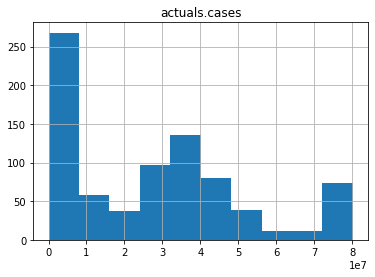

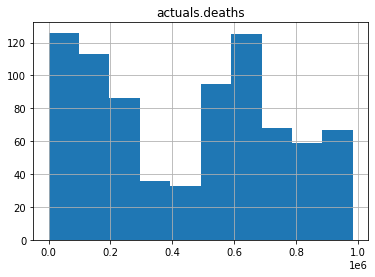

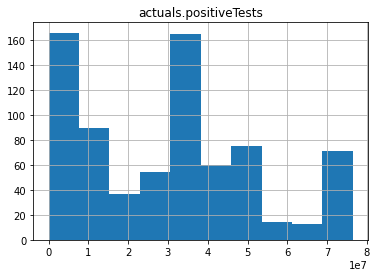

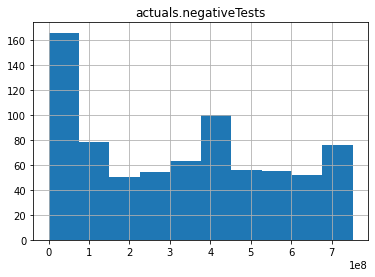

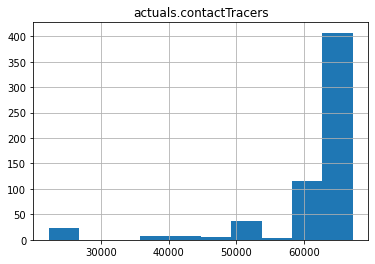

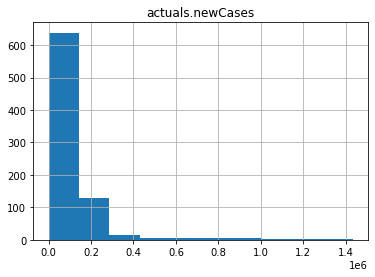

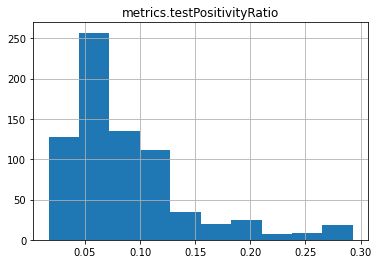

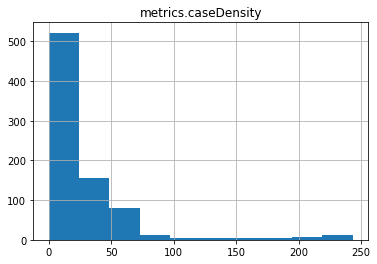

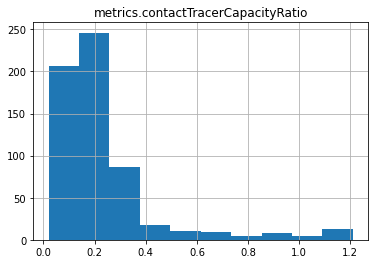

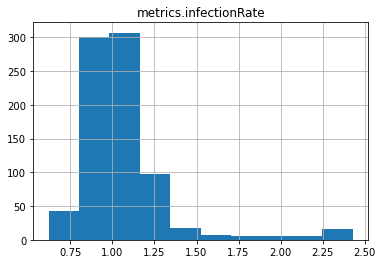

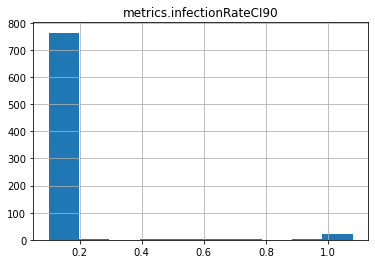

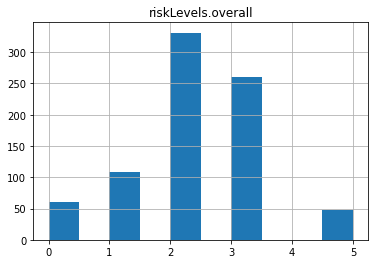

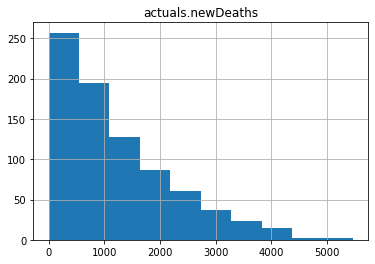

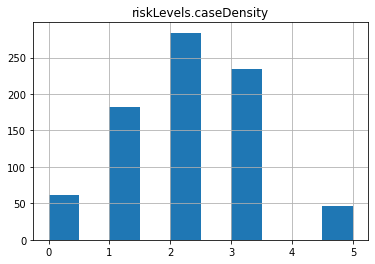

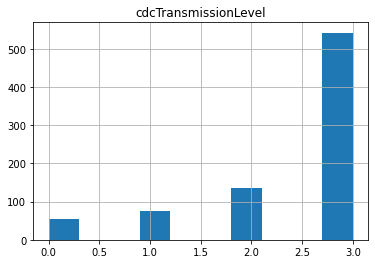

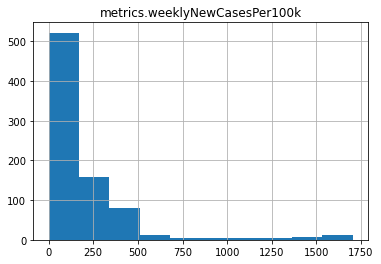

In [18]:
# Lets look atthe histograms for each column
view_hist(covid)

In [19]:
#type check
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 2020-01-21 to 2022-04-07
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   actuals.cases                       808 non-null    int64  
 1   actuals.deaths                      808 non-null    int64  
 2   actuals.positiveTests               745 non-null    float64
 3   actuals.negativeTests               750 non-null    float64
 4   actuals.contactTracers              607 non-null    float64
 5   actuals.newCases                    806 non-null    float64
 6   metrics.testPositivityRatio         745 non-null    float64
 7   metrics.caseDensity                 807 non-null    float64
 8   metrics.contactTracerCapacityRatio  606 non-null    float64
 9   metrics.infectionRate               806 non-null    float64
 10  metrics.infectionRateCI90           806 non-null    float64
 11  riskLevels.overall                

In [20]:
# make a list of the columns to convert
# these should be floats: metrics.caseDensity , metrics.infectionRate, metrics.infectionRateCI90, metrics.weeklyNewCasesPer100k
# everything else should be an integer
floats_to_ints= ['actuals.positiveTests',
                 'actuals.negativeTests',
                 'actuals.contactTracers',
                 'actuals.newCases',
                 'metrics.testPositivityRatio',
                 'metrics.contactTracerCapacityRatio',
                 'actuals.newDeaths']

# convert the list of columns into integers
for column in floats_to_ints:
    covid[column] = covid[column].astype(int, errors='ignore')

In [21]:
# the columns didn't convert.... why?
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 2020-01-21 to 2022-04-07
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   actuals.cases                       808 non-null    int64  
 1   actuals.deaths                      808 non-null    int64  
 2   actuals.positiveTests               745 non-null    float64
 3   actuals.negativeTests               750 non-null    float64
 4   actuals.contactTracers              607 non-null    float64
 5   actuals.newCases                    806 non-null    float64
 6   metrics.testPositivityRatio         745 non-null    float64
 7   metrics.caseDensity                 807 non-null    float64
 8   metrics.contactTracerCapacityRatio  606 non-null    float64
 9   metrics.infectionRate               806 non-null    float64
 10  metrics.infectionRateCI90           806 non-null    float64
 11  riskLevels.overall                

In [22]:
covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,0,0.0
2020-01-22,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0.0,0,0,0.0
2020-01-23,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.12,1.04,0,0.0,0,0,0.0
2020-01-24,2,0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.13,1.02,0,0.0,0,0,0.0
2020-01-25,3,0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.14,1.01,0,0.0,0,0,0.0


In [23]:
# For some reason the index isn't a datetime and i can't convert it directly so i'll just make a 
# copy and make that the index
covid['date']= covid.index

# First make sure the column you want is a datetime type
covid.date = pd.to_datetime(covid.date)

# Then sort the rows by the date and set the index as that date
covid = covid.set_index("date").sort_index()

covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,0,0.0
2020-01-22,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0.0,0,0,0.0
2020-01-23,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.12,1.04,0,0.0,0,0,0.0
2020-01-24,2,0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.13,1.02,0,0.0,0,0,0.0
2020-01-25,3,0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,1.14,1.01,0,0.0,0,0,0.0


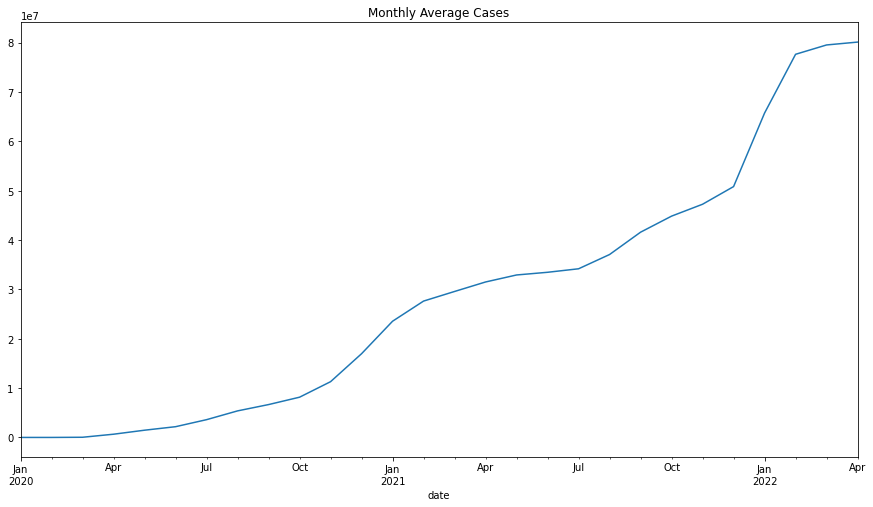

In [24]:
# Are cases increasing or decreasing? Oh my!
plt.figure(figsize = (15,8))
covid['actuals.cases'].resample('M').mean().plot(title='Monthly Average Cases');

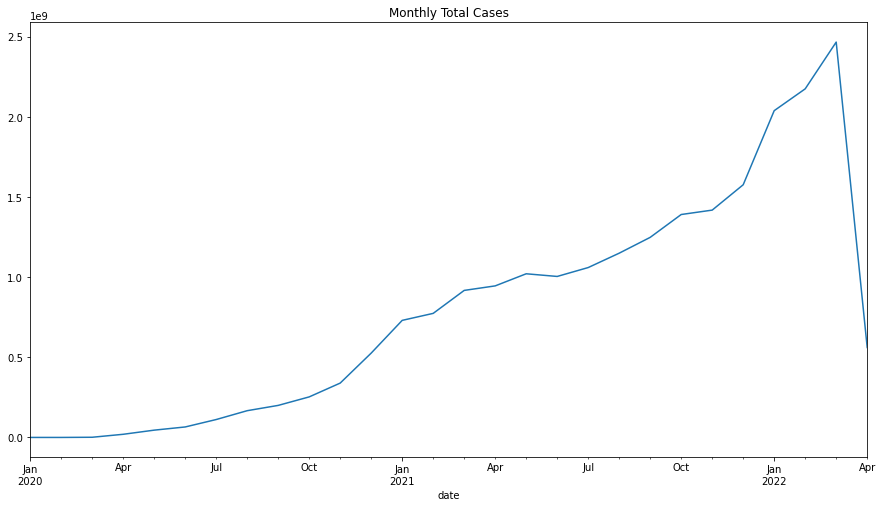

In [25]:
plt.figure(figsize = (15,8))
covid['actuals.cases'].resample('M').sum().plot(title='Monthly Total Cases');

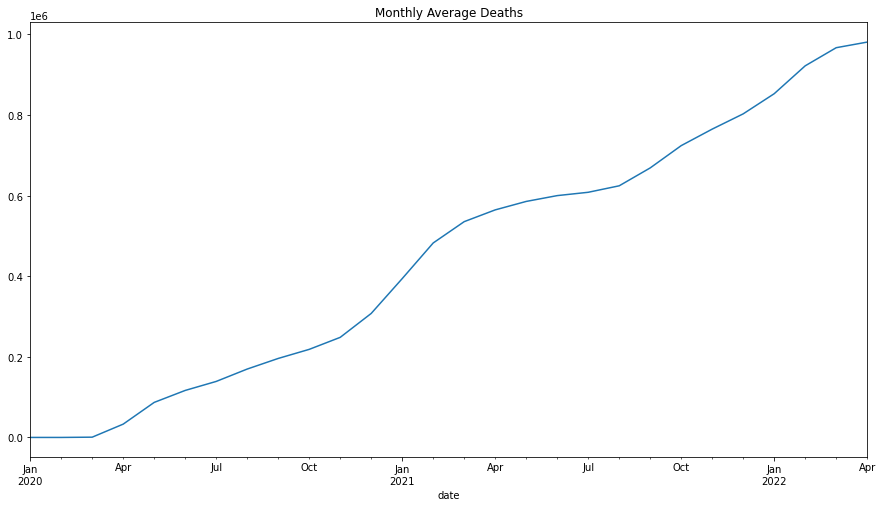

In [26]:
# Are deaths increaing steeply or slowly?
plt.figure(figsize = (15,8))
covid['actuals.deaths'].resample('M').mean().plot(title='Monthly Average Deaths');

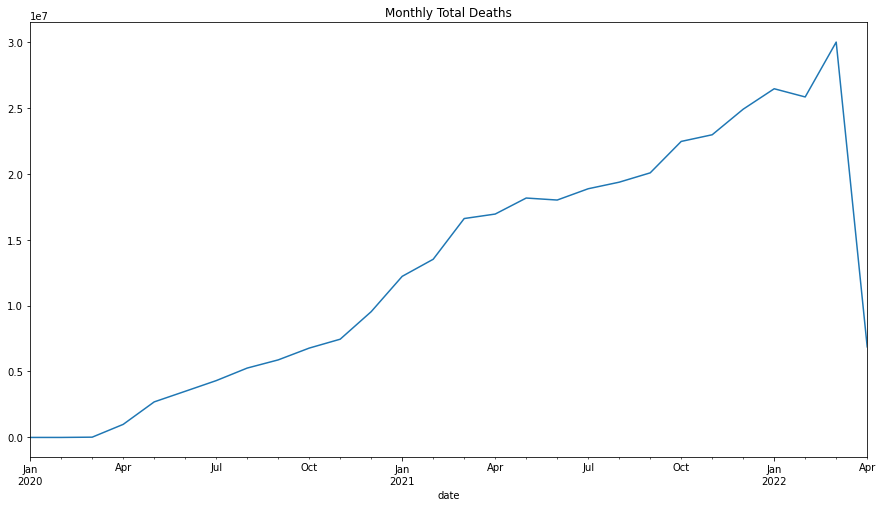

In [27]:
plt.figure(figsize = (15,8))
covid['actuals.deaths'].resample('M').sum().plot(title='Monthly Total Deaths');

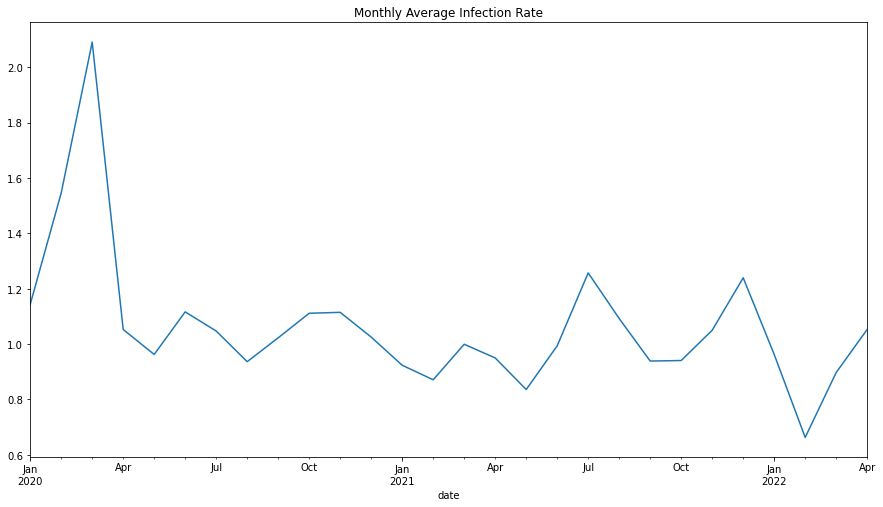

In [28]:
plt.figure(figsize = (15,8))
covid['metrics.infectionRate'].resample('M').mean().plot(title='Monthly Average Infection Rate');

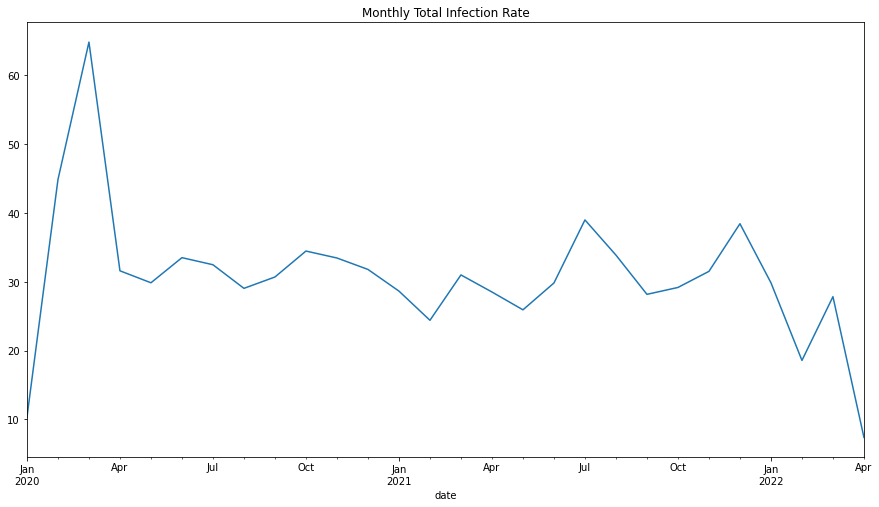

In [29]:
plt.figure(figsize = (15,8))
covid['metrics.infectionRate'].resample('M').sum().plot(title='Monthly Total Infection Rate');

## Current Month Stats

In [33]:
current = covid['Apr 2022']
current

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2022-04-01,80037203,979881,NaN,NaN,NaN,33018.0,NaN,8.8,NaN,1.03,0.1,1,645.0,1,2,61.4
2022-04-02,80048598,980018,NaN,NaN,NaN,11395.0,NaN,8.7,NaN,1.04,0.1,1,137.0,1,2,61.2
2022-04-03,80053525,980057,NaN,NaN,NaN,4927.0,NaN,8.6,NaN,1.05,0.1,1,39.0,1,2,60.5
2022-04-04,80094565,980682,NaN,NaN,NaN,41040.0,NaN,8.6,NaN,1.05,0.1,1,625.0,1,2,60.1
2022-04-05,80125458,981146,NaN,NaN,NaN,30893.0,NaN,8.8,NaN,1.06,0.1,1,464.0,1,2,61.7
2022-04-06,80174781,982264,NaN,NaN,NaN,49323.0,NaN,9.0,NaN,1.07,0.1,1,1118.0,1,2,62.8
2022-04-07,80209904,982972,NaN,NaN,NaN,35123.0,NaN,8.9,NaN,1.07,0.1,1,708.0,1,2,62.1


In [41]:
# Total cases added this months
total_actual_cases = current['actuals.cases'].max() - current['actuals.cases'].min()
print(f"Total Cases in {current.index.month_name()[0]}: {total_actual_cases}.")

Total Cases in April: 172701.


In [40]:
# Total deaths added this months
total_actual_deaths = current['actuals.deaths'].max() - current['actuals.deaths'].min()
print(f"Total Deaths in {current.index.month_name()[0]}: {total_actual_deaths}.")

Total Deaths in April: 3091.


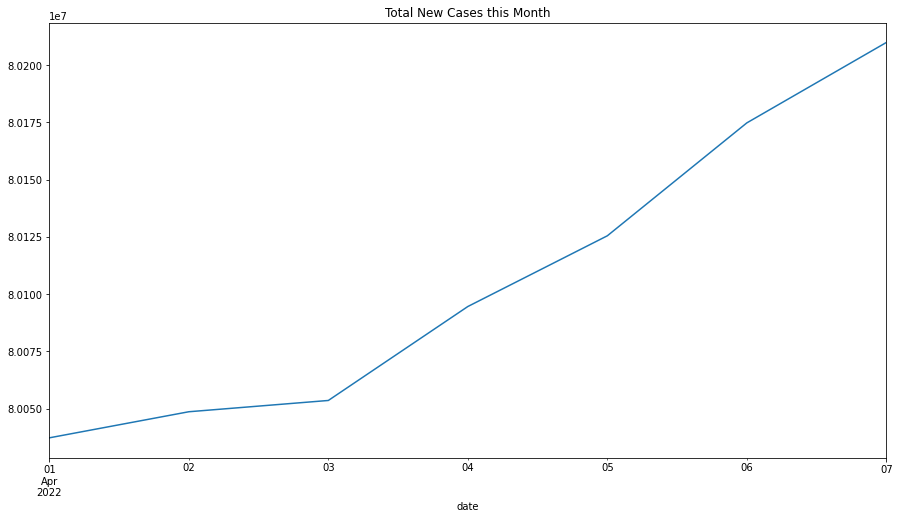

In [47]:
# Number of cases this month
plt.figure(figsize = (15,8))
current['actuals.cases'].plot(title='Total New Cases this Month');

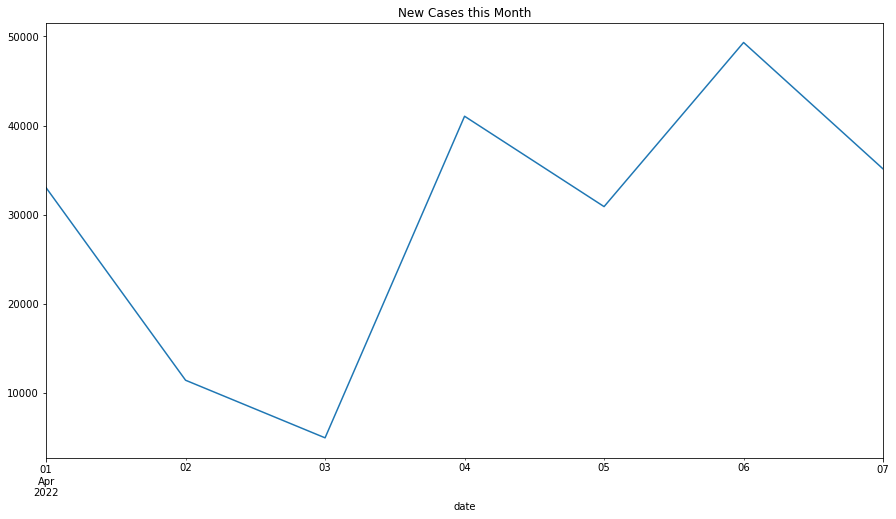

In [46]:
# Number of cases teach day
plt.figure(figsize = (15,8))
current['actuals.newCases'].plot(title='New Cases this Month');

In [ ]:
# Next I can get state data and see how Texas is doing

---
# Modeling
---

### Baseline Model

In [30]:
# code here

---
# Evaluate
---

In [31]:
# code here

---
# Conclusion
---

Summary goes here